
# 1. Data Exploration:

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Reading the dataset

df = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Projects\Song Recommendation\song_recommendation_dataset.csv")

In [3]:
# Displaying the head of dataset

df.head()

,Song_ID,Song_Name,Artist,Genre,Duration,Release_Year,Popularity,User_ID,User_Rating,Timestamp
0,Song_1,Current letter,Daniel Bedingfield,Metal,295978,2003,35,User_88,5,2021-02-26 17:52:28.737387
1,Song_2,Think shake,Stevie Appleton,Metal,343777,1999,32,User_9,2,2022-12-14 05:16:02.126205
2,Song_3,May tree include reveal,Black,Metal,110355,2010,29,User_71,5,2020-11-01 08:02:00.656213
3,Song_4,Fire suffer hope world,Drake,Electronic/Dance,305498,2024,93,User_94,2,2023-03-12 14:59:13.263859
4,Song_5,Call with Mrs,Graham Bonney,Latin,211359,2008,99,User_32,2,2021-06-11 03:46:02.166301


In [4]:
# Displaying the tail of dataset

df.tail()

,Song_ID,Song_Name,Artist,Genre,Duration,Release_Year,Popularity,User_ID,User_Rating,Timestamp
14995,Song_14996,Pass one often,Andy Bell,K-pop,334206,1994,79,User_45,3,2021-02-13 21:38:37.206389
14996,Song_14997,General design common meeting,Angelle,Soul,295234,1996,80,User_34,2,2022-05-09 00:10:55.042301
14997,Song_14998,Customer behavior,Billie Eilish,Latin,161405,1999,60,User_63,3,2023-01-31 08:19:38.960431
14998,Song_14999,Church figure,Tom Bailey,Electronic/Dance,167992,2004,79,User_42,4,2020-09-03 08:56:19.046334
14999,Song_15000,Find pattern school,Lady Gaga,Jazz,331627,2016,47,User_57,5,2022-05-30 11:30:27.504514


In [5]:
# General info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song_ID       15000 non-null  object
 1   Song_Name     15000 non-null  object
 2   Artist        15000 non-null  object
 3   Genre         15000 non-null  object
 4   Duration      15000 non-null  int64 
 5   Release_Year  15000 non-null  int64 
 6   Popularity    15000 non-null  int64 
 7   User_ID       15000 non-null  object
 8   User_Rating   15000 non-null  int64 
 9   Timestamp     15000 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.1+ MB


In [6]:
# Converting datatypes into suitable format

# Convert 'Duration' from milliseconds to seconds
df['Duration'] = df['Duration'] / 1000

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert Release Year to Decade
df['Decade'] = (df['Release_Year'] // 10) * 10

In [7]:
# Dropping unnecessary columns

df.drop(columns=['Song_ID'], inplace=True)


In [8]:
# Checking presence of null values

df.isnull().sum()

Song_Name       0
Artist          0
Genre           0
Duration        0
Release_Year    0
Popularity      0
User_ID         0
User_Rating     0
Timestamp       0
Decade          0
dtype: int64

In [9]:
# Displaying shape of dataset 

df.shape

(15000, 10)

In [10]:
# Checking presence of duplicate values

df.duplicated().sum()

0

In [11]:
skewness = df[['Duration', 'Release_Year', 'Popularity', 'User_Rating']].skew()
print(skewness)

Duration        0.017145
Release_Year   -0.006044
Popularity     -0.010111
User_Rating     0.008176
dtype: float64


In [12]:
# Summary statistics

df.describe()

,Duration,Release_Year,Popularity,User_Rating,Decade
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,208.829460,2007.099267,50.746267,2.993133,2002.925333
std,86.650925,10.125222,28.869698,1.413230,10.344542
min,60.016000,1990.000000,1.000000,1.000000,1990.000000
25%,133.629750,1998.000000,26.000000,2.000000,1990.000000
50%,208.443000,2007.000000,51.000000,3.000000,2000.000000
75%,283.780000,2016.000000,76.000000,4.000000,2010.000000
max,359.994000,2024.000000,100.000000,5.000000,2020.000000


# 2. Exploratory Data Analysis:

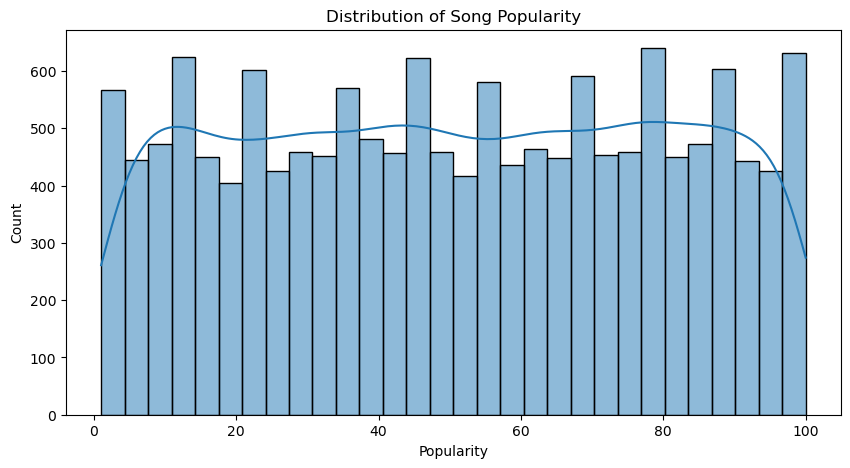

In [13]:
# Distribution of song popularity

plt.figure(figsize=(10,5))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


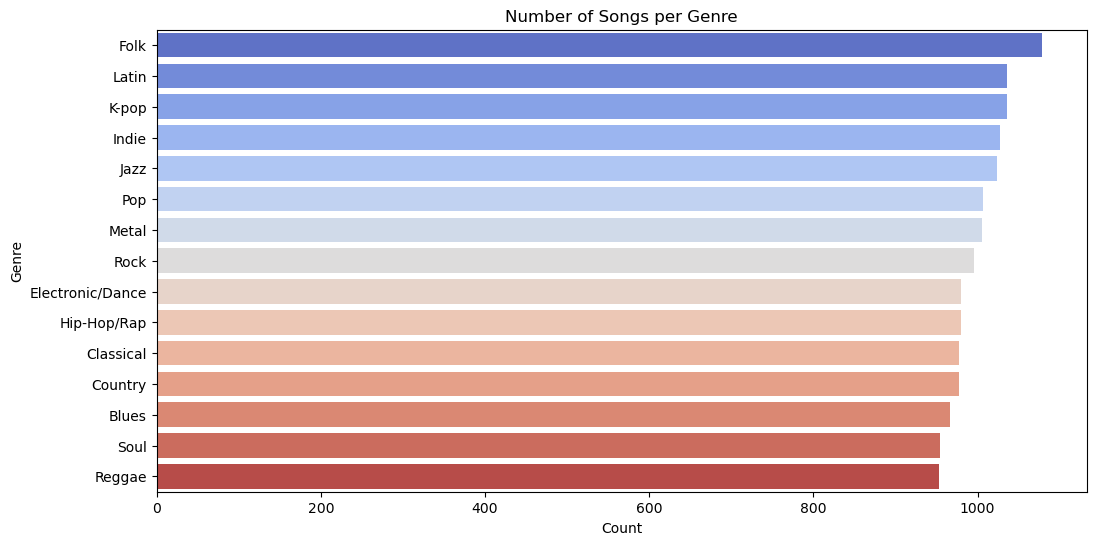

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette="coolwarm")
plt.title("Number of Songs per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


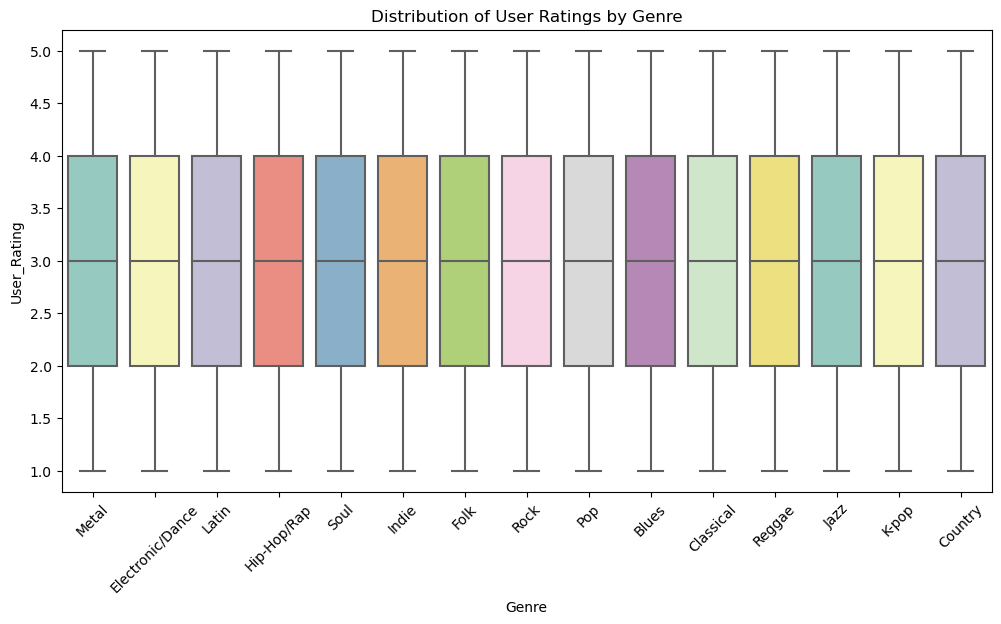

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='User_Rating', data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribution of User Ratings by Genre")
plt.show()


C:\Users\sahil\AppData\Local\Temp\ipykernel_12260\1039248589.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Release_Year", y="Popularity", data=df, ci=None, marker="o")


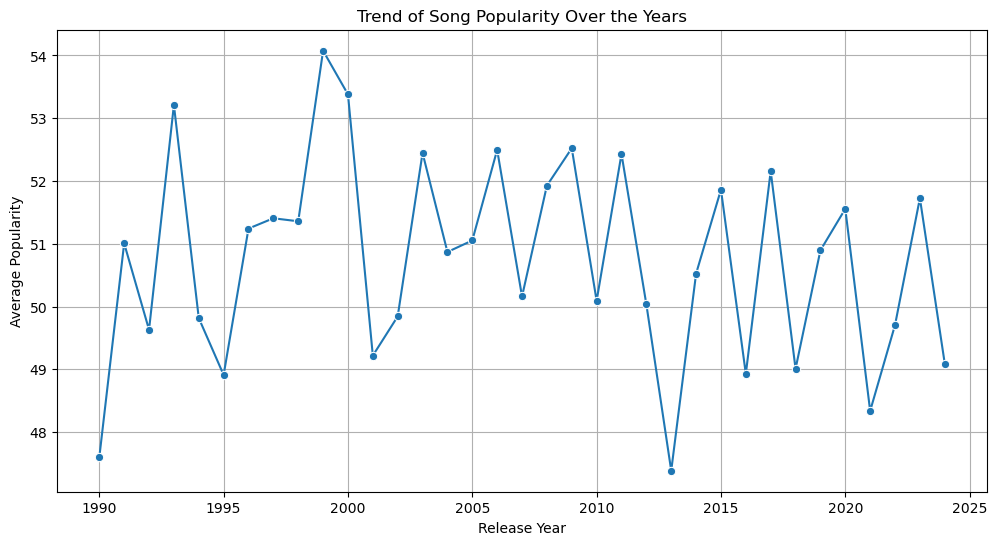

In [16]:
df['Release_Year'] = df['Release_Year'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(x="Release_Year", y="Popularity", data=df, ci=None, marker="o")
plt.title("Trend of Song Popularity Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.show()


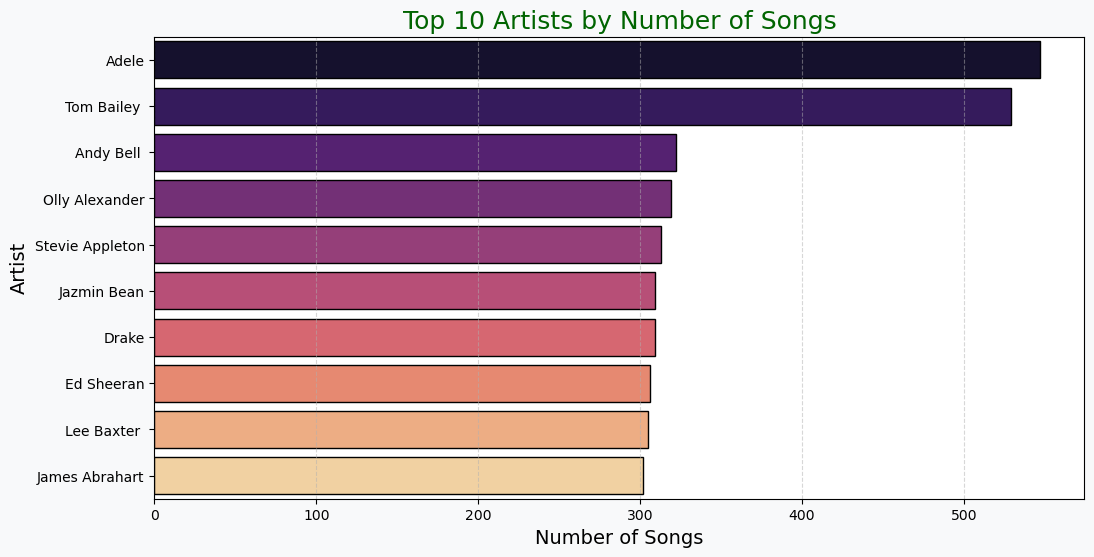

In [35]:
#Top 10 Artists by Number of Songs

plt.figure(figsize=(12, 6), facecolor='#f8f9fa')
top_artists = df['Artist'].value_counts().nlargest(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma', edgecolor='black')
plt.title('Top 10 Artists by Number of Songs', fontsize=18, color='darkgreen')
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

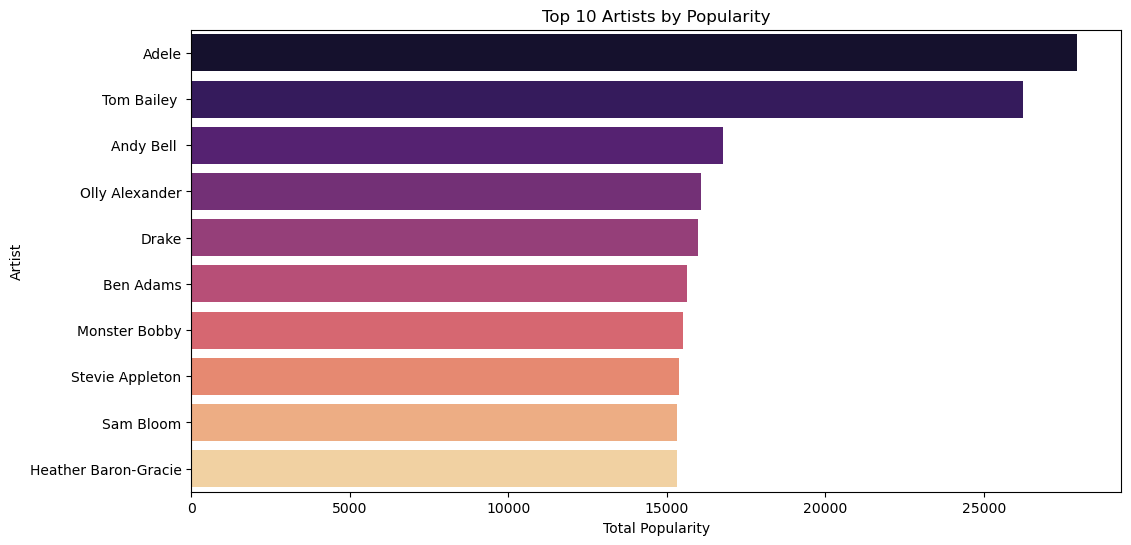

In [17]:
# Plotting top 10 artists based on popualrity

# Aggregate popularity per artist
artist_popularity = df.groupby('Artist')['Popularity'].sum().reset_index()

# Get top 10 artists based on total popularity
top_artists = artist_popularity.sort_values(by="Popularity", ascending=False).head(10)

# Plot the top 10 artists based on popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists["Popularity"], y=top_artists["Artist"], palette="magma")
plt.xlabel("Total Popularity")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Popularity")
plt.show()


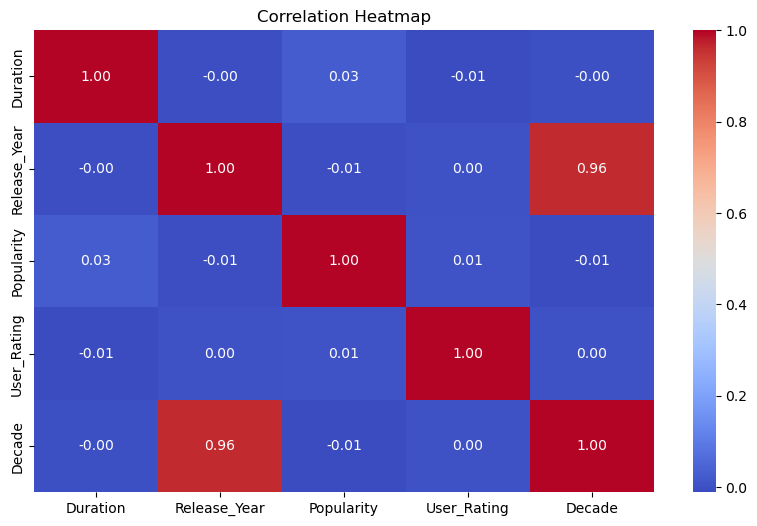

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

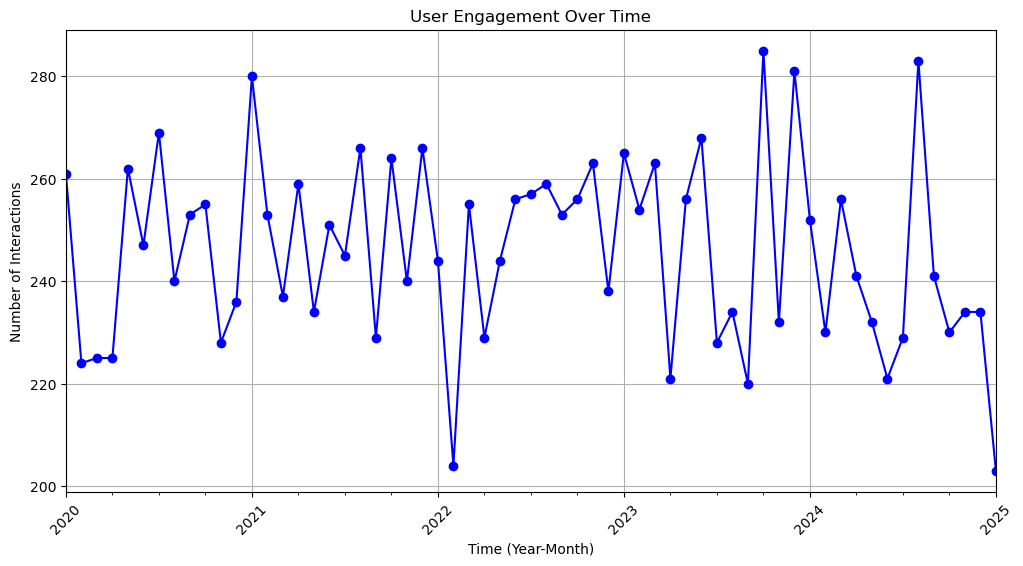

In [19]:
df['YearMonth'] = df['Timestamp'].dt.to_period('M')

plt.figure(figsize=(12,6))
df.groupby('YearMonth').size().plot(kind='line', marker='o', color='b')
plt.title("User Engagement Over Time")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


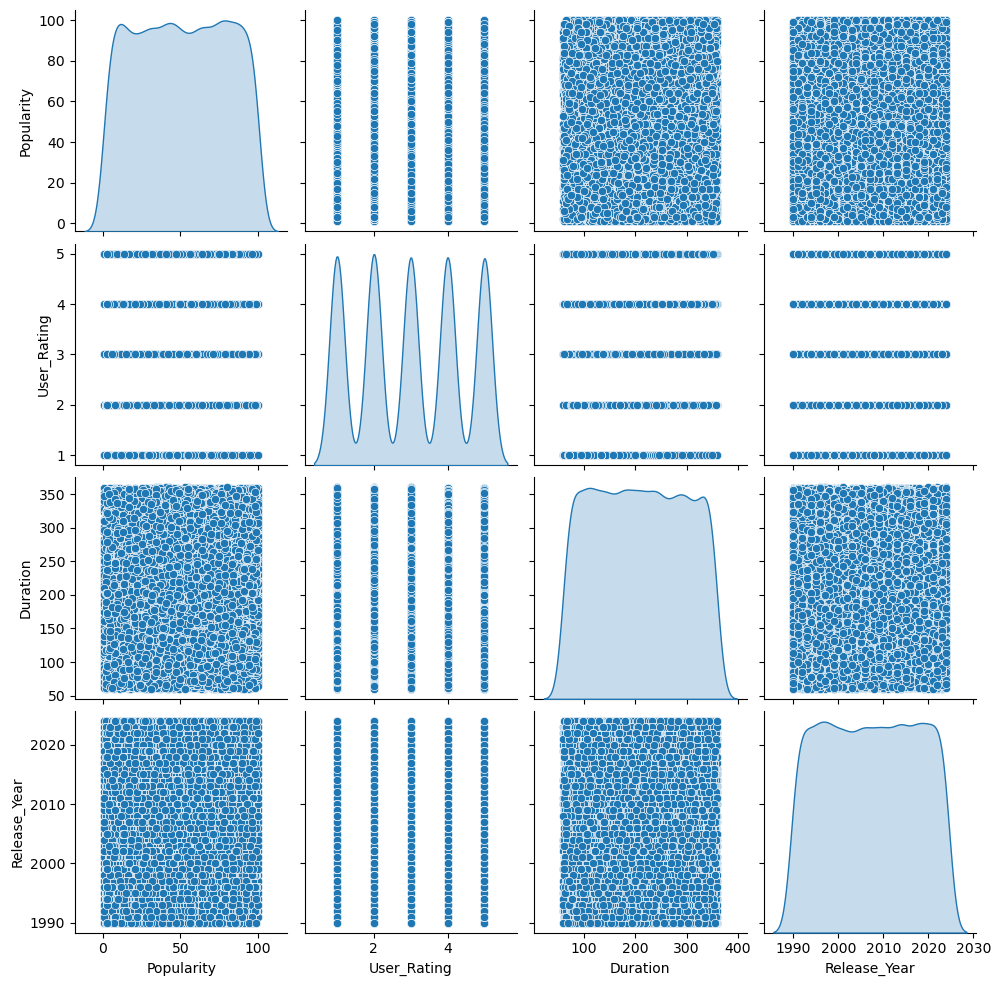

In [20]:
sns.pairplot(df[['Popularity', 'User_Rating', 'Duration', 'Release_Year']], diag_kind='kde')
plt.show()


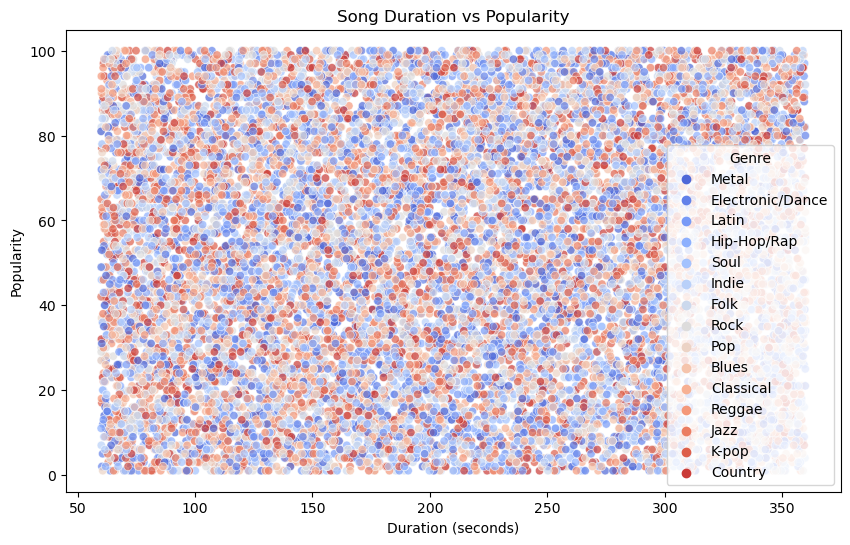

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Duration"], y=df["Popularity"], alpha=0.7, hue=df["Genre"], palette="coolwarm")
plt.xlabel("Duration (seconds)")
plt.ylabel("Popularity")
plt.title("Song Duration vs Popularity")
plt.show()


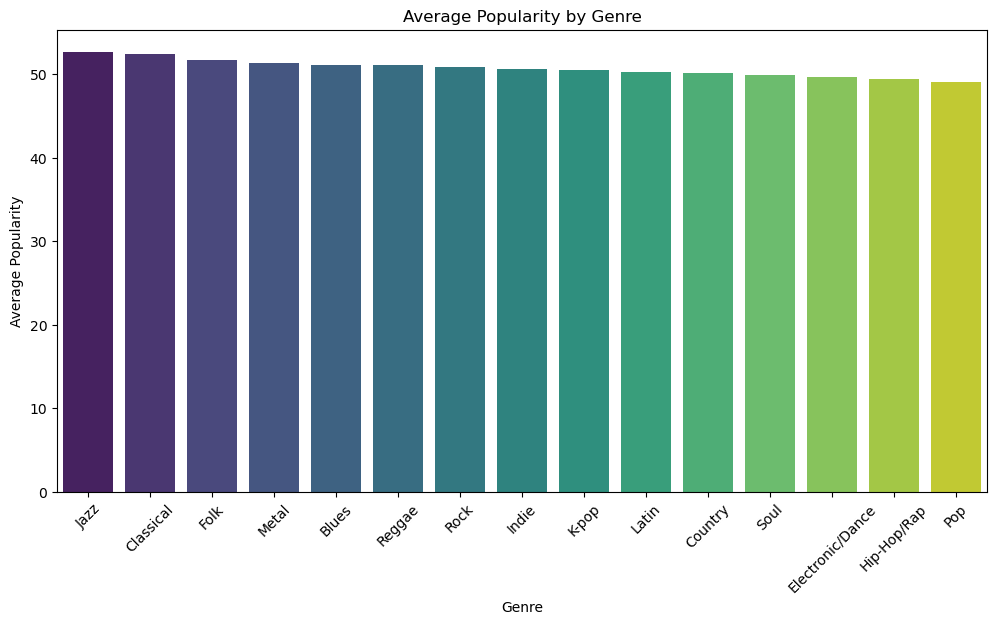

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby("Genre")["Popularity"].mean().sort_values(ascending=False).index, 
            y=df.groupby("Genre")["Popularity"].mean().sort_values(ascending=False).values, 
            palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.title("Average Popularity by Genre")
plt.show()


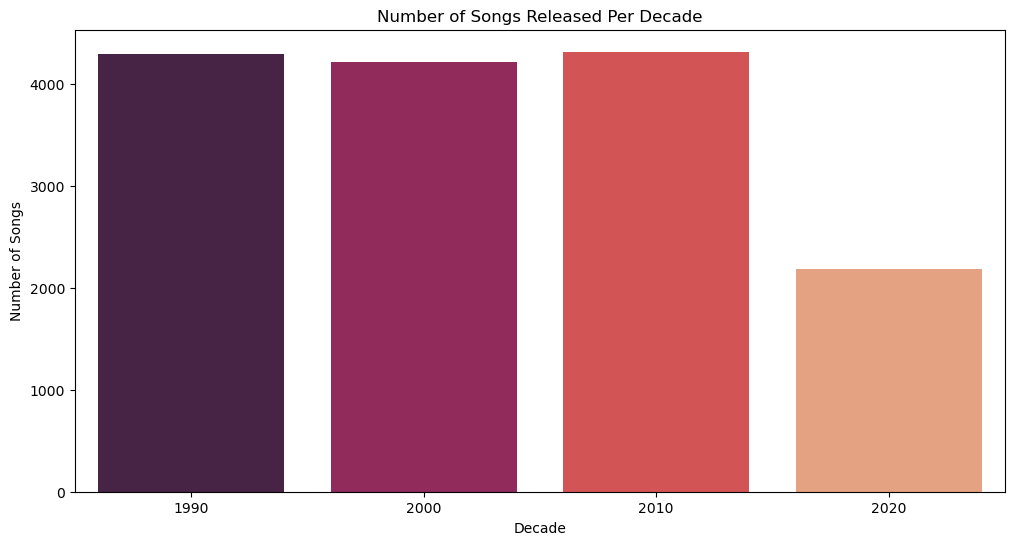

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Decade"], palette="rocket")
plt.xlabel("Decade")
plt.ylabel("Number of Songs")
plt.title("Number of Songs Released Per Decade")
plt.show()


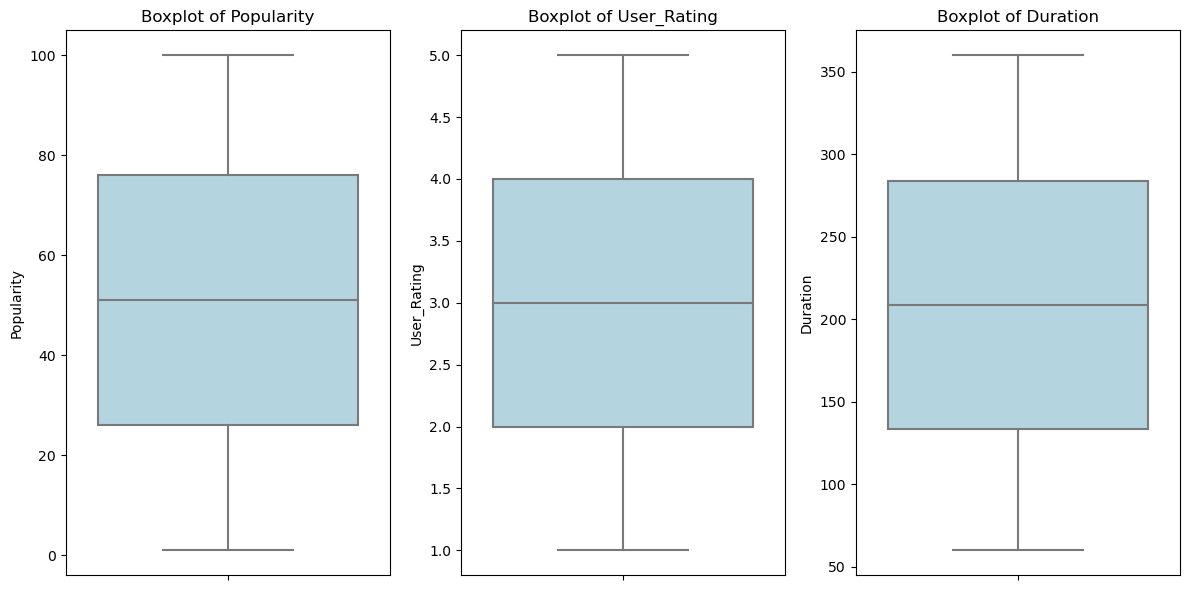

In [24]:
# Boxplot to detect outliers

# List of numerical columns to check for outliers
num_features = ["Popularity", "User_Rating", "Duration"]

# Create boxplots for detecting outliers
plt.figure(figsize=(12,6))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, len(num_features), i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# 3. Model Building


Now we can build model using techniques, first is using content based filtering and second using collaborative filtering

# 1) Content Based Filtering:

In [25]:
# Normalize numerical features

scaler = MinMaxScaler()
df[['Popularity', 'Duration', 'User_Rating']] = scaler.fit_transform(df[['Popularity', 'Duration', 'User_Rating']])


In [26]:
# Create a combined text feature for content-based filtering

df['Combined_Features'] = df['Artist'] + " " + df['Genre']

In [27]:
# TF-IDF Vectorization for text-based features
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df['Combined_Features'])

In [28]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

In [29]:
# Function for Content-Based Filtering
def recommend_songs(song_name, df, cosine_sim, top_n=10):
    if song_name not in df['Song_Name'].values:
        return "Song not found in the dataset!"
    
    # Get song index
    idx = df[df['Song_Name'] == song_name].index[0]
    
    # Get similarity scores for all songs
    similarity_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort songs based on similarity
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N similar songs (excluding itself)
    recommended_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    
    # Return recommended songs
    return df.iloc[recommended_indices][['Song_Name', 'Artist', 'Genre', 'Popularity']]

# 2) Collaborative Based Filtering 

In [30]:
# Collaborative Filtering Using User-Based Similarity
user_song_matrix = df.pivot_table(index='User_ID', columns='Song_Name', values='User_Rating').fillna(0)


In [31]:
# Compute Cosine Similarity Between Users
user_similarity = cosine_similarity(user_song_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=user_song_matrix.index, columns=user_song_matrix.index)

In [32]:
# Function for User-Based Collaborative Filtering
def user_based_recommendation(user_id, df, user_sim_df, top_n=5):
    if user_id not in user_sim_df.index:
        return "User not found!"
    
    # Find similar users
    similar_users = user_sim_df[user_id].sort_values(ascending=False).index[1:top_n+1]
    
    # Get songs rated highly by similar users
    song_recommendations = df[df['User_ID'].isin(similar_users)].groupby('Song_Name')['User_Rating'].mean().sort_values(ascending=False).head(top_n)
    
    return song_recommendations.reset_index()


In [33]:
# Streamlit App Interface
st.title('Song Recommendation System')

# Option to choose between Content-Based or Collaborative Filtering
option = st.selectbox(
    'Choose Recommendation Method:',
    ['Content-Based Filtering', 'Collaborative Filtering']
)

if option == 'Content-Based Filtering':
    st.header("Content-Based Recommendations")
    
    # Input song name for recommendations
    song_name = st.text_input("Enter a Song Name:", "")
    
    if song_name:
        recommendations = recommend_songs(song_name, df, cosine_sim)
        if isinstance(recommendations, str):
            st.write(recommendations)  # If song not found
        else:
            st.write("Recommended Songs:")
            st.dataframe(recommendations)

elif option == 'Collaborative Filtering':
    st.header("Collaborative Filtering Recommendations")
    
    # Input user ID for recommendations
    user_id = st.text_input("Enter User ID:", "")
    
    if user_id:
        recommendations = user_based_recommendation(user_id, df, user_sim_df)
        if isinstance(recommendations, str):
            st.write(recommendations)  # If user not found
        else:
            st.write("Recommended Songs for User:")
            st.dataframe(recommendations)

2025-02-16 17:01:45.412 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 17:01:50.117 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-16 17:01:50.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 17:01:50.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 17:01:50.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 17:01:50.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 17:01:50.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 17:01:50.143 Session state does not 